# King County Housing Price Prediction

Due to COVID-19, a lot of people are working remotely and have moved off to states with friendlier living cost.
However, before moving, we search the internet to find a house for the best price. Therefore, companies like Zillow and Streeteasy might want to make sure that their customers get the best deals for the house. In order to do that, they would need a crystal ball that would predict the scores. Unfortunatly, crystal balls do not exisit but thankfully, Data Scientist do and we can create a Machine Learning algorithm that can predict the housing price given certain features. 




In this project, I will be analyzing the three following things:
-1) Does the distance from downtown Seattle affect the housing price
-2) 

In [1]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

#set display parameters
pd.set_option('display.max_rows', 20000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# import datafiles
training = pd.read_csv("kc_house_data_train.csv", index_col = 0)
holdout = pd.read_csv("kc_house_data_test_features.csv", index_col = 0)
imputed = pd.read_csv("bedroomsfilled.csv", index_col = 0)
extra = pd.read_csv("zip_code_extra_data_fixed.csv", index_col = 0)
date = pd.read_csv("date.csv", index_col = 0)

### Checking out the Sales dataframe

In [3]:
print(training.shape) #training and testing df to create a model for prediction
print(holdout.shape) #applying the model to predict the sales for the houses
print(imputed.shape) #missing data for 12 rows (no bedrooms)
print(extra.shape) # extra data on the 70 zipcodes from https://www.unitedstateszipcodes.org/
print(date.shape) # date from the training datafile. 
sales = training.copy()
prices=pd.DataFrame(sales["price"])
holdout["grade_3"]=0
sales.head()

(17290, 21)
(4323, 20)
(12, 21)
(70, 54)
(17290, 1)


id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  2591820310  20141006T000000   365000.0         4       2.25         2070      8893     2.0           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700
1  7974200820  20140821T000000   865000.0         5       3.00         2900      6730     1.0           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283
2  7701450110  20140815T000000  1038000.0         4       2.50         3770     10893     2.0           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685
3  9522300010  20150331T000000  1490000.0         3       3.50         4560     14608     2.0           0     2          3     12        4560              0      1990             0    98034  47.6995 -122.228           4050       14226
4  9510861140  20140714T000000   711000.0         3       2.50         2550      5376     2.0           0     0          3      9        2550              0      2004             0    98052  47.6647 -122.083           2250        4050

In [4]:
prices

price
0       365000.0
1       865000.0
2      1038000.0
3      1490000.0
4       711000.0
5       211000.0
6       790000.0
7       680000.0
8       384500.0
9       605000.0
10      638000.0
11      385000.0
12      175000.0
13      365000.0
14      160000.0
15     1070000.0
16      800000.0
17      795127.0
18      355000.0
19      474000.0
20      485000.0
21      930000.0
22      920000.0
23      560000.0
24      654000.0
25      549000.0
26      290000.0
27      275000.0
28      329990.0
29      750000.0
30      425000.0
31      515000.0
32      605000.0
33      250000.0
34      330000.0
35      984000.0
36      827500.0
37      485000.0
38      306000.0
39     1890000.0
40      514000.0
41      282613.0
42      309000.0
43      400000.0
44      310000.0
45      253200.0
46      334009.0
47      500000.0
48      441500.0
49      685000.0
50      327000.0
51      450000.0
52      356000.0
53      525000.0
54      675000.0
55      875000.0
56      345000.0
57      695000.0
58      350000.0
59      695000.0
60      400000.0
61      330000.0
62      265000.0
63      630000.0
64      312000.0
65      156000.0
66      300000.0
67     1225000.0
68      465000.0
69      923990.0
70      320000.0
71      375000.0
72      985000.0
73      850000.0
74      474900.0
75      997000.0
76     1302000.0
77      209900.0
78      602000.0
79     1228000.0
80      856000.0
81      392000.0
82      500000.0
83      230000.0
84     1145000.0
85      560000.0
86      355000.0
87      785000.0
88      447500.0
89      540000.0
90      252000.0
91      455000.0
92      619850.0
93     1250000.0
94      495000.0
95      540000.0
96      286651.0
97      261000.0
98      830000.0
99      450000.0
100     260000.0
101    1450000.0
102     480000.0
103     270000.0
104    1160000.0
105     250000.0
106     650000.0
107     589950.0
108     743700.0
109    1925000.0
110     316000.0
111     235867.0
112     716000.0
113     683000.0
114     345000.0
115     270000.0
116     239000.0
117     385195.0
118     273000.0
119     476900.0
120     551000.0
121     448000.0
122     411100.0
123     223000.0
124     335500.0
125     730000.0
126     197200.0
127     725000.0
128     342500.0
129     340000.0
130     418000.0
131     410000.0
132     240000.0
133     800000.0
134     275000.0
135     617950.0
136     396000.0
137     309000.0
138    1275000.0
139     572500.0
140     518500.0
141     710000.0
142     600000.0
143     467000.0
144     309000.0
145     362500.0
146     390000.0
147     208417.0
148     340000.0
149     467500.0
150     829000.0
151     959750.0
152     542000.0
153    2250000.0
154     575000.0
155     690000.0
156     699950.0
157     408500.0
158     595000.0
159     313000.0
160     781000.0
161     371000.0
162     268000.0
163     331000.0
164     321000.0
165     375000.0
166     298000.0
167     209500.0
168     440000.0
169     350000.0
170     618000.0
171     320000.0
172     234950.0
173     665000.0
174     500000.0
175     575000.0
176     320000.0
177     464000.0
178     280000.0
179     350000.0
180     249000.0
181     531000.0
182     472800.0
183     710000.0
184     580000.0
185     330000.0
186     174950.0
187     565000.0
188     534000.0
189     503500.0
190     235000.0
191     558000.0
192     966000.0
193    1297000.0
194     310000.0
195     535000.0
196     432000.0
197    1750000.0
198     675000.0
199     337000.0
200     410000.0
201     320000.0
202     585000.0
203     835000.0
204     863000.0
205     320000.0
206     613000.0
207     180000.0
208     560000.0
209     530000.0
210     347000.0
211     260000.0
212     585000.0
213     440000.0
214     305000.0
215     650500.0
216     590000.0
217     245000.0
218     329999.0
219     470000.0
220    2885000.0
221     580000.0
222     745000.0
223     350000.0
224     515000.0
225     756100.0
226     472500.0
227     900000.0
228     895000.0
229     255000.0
230     380000.0
231     265000.0
232     728000.0
233     194000.0
234     300000.0

In [5]:
sales.tail()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
17285   627300195  20150303T000000  750000.0         5       2.50         3240      9960     1.0           0     1          3      8        2020           1220      1958             0    98008  47.5858 -122.112           2730       10400
17286  8819900270  20140520T000000  440000.0         2       1.75         1300      4000     2.0           0     0          3      7        1300              0      1948             0    98105  47.6687 -122.288           1350        4013
17287  3816300095  20140514T000000  310000.0         3       1.00         1050      9876     1.0           0     0          3      7        1050              0      1953             0    98028  47.7635 -122.262           1760        9403
17288   122069107  20141204T000000  427500.0         3       1.50         1900     43186     1.5           0     0          4      7        1300            600      1971             0    98038  47.4199 -121.990           2080      108028
17289  6703100135  20150116T000000  348000.0         3       1.50         1330      6768     1.0           0     0          4      7        1330              0      1952             0    98155  47.7366 -122.319           1320        6910

In [6]:
# date=pd.DataFrame(sales["date"]) 
# date.to_csv("date.csv")      -> commented out because its already been extracted

In [7]:
sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
sales.describe()

id         price      bedrooms     bathrooms   sqft_living      sqft_lot        floors    waterfront          view     condition         grade    sqft_above  sqft_basement      yr_built  yr_renovated       zipcode           lat          long  sqft_living15     sqft_lot15
count  1.729000e+04  1.729000e+04  17290.000000  17290.000000  17290.000000  1.729000e+04  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000   17290.000000
mean   4.565502e+09  5.407395e+05      3.372470      2.111943   2081.464604  1.524340e+04      1.490312      0.007981      0.238519      3.408502      7.654425   1789.306015     292.158589   1970.792019     83.806304  98078.193175     47.560058   -122.214258    1987.986698   12873.475824
std    2.874656e+09  3.733190e+05      0.939346      0.770476    920.018539  4.230462e+04      0.538909      0.088985      0.775229      0.651296      1.174718    829.265107     443.151874     29.343516    400.329376     53.607949      0.138412      0.140857     684.802635   27227.437583
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000  5.720000e+02      1.000000      0.000000      0.000000      1.000000      1.000000    290.000000       0.000000   1900.000000      0.000000  98001.000000     47.155900   -122.519000     399.000000     659.000000
25%    2.114701e+09  3.210000e+05      3.000000      1.500000   1430.000000  5.081250e+03      1.000000      0.000000      0.000000      3.000000      7.000000   1200.000000       0.000000   1951.000000      0.000000  98033.000000     47.471200   -122.329000    1490.000000    5111.250000
50%    3.903650e+09  4.500000e+05      3.000000      2.250000   1920.000000  7.642000e+03      1.500000      0.000000      0.000000      3.000000      7.000000   1560.000000       0.000000   1974.000000      0.000000  98065.000000     47.571600   -122.230000    1840.000000    7622.500000
75%    7.301150e+09  6.450000e+05      4.000000      2.500000   2550.000000  1.072575e+04      2.000000      0.000000      0.000000      4.000000      8.000000   2214.500000     560.000000   1996.000000      0.000000  98118.000000     47.677900   -122.126000    2360.000000   10101.750000
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06      3.500000      1.000000      4.000000      5.000000     13.000000   9410.000000    4820.000000   2015.000000   2015.000000  98199.000000     47.777600   -121.315000    6210.000000  858132.000000

In [9]:
corr = sales.corr()

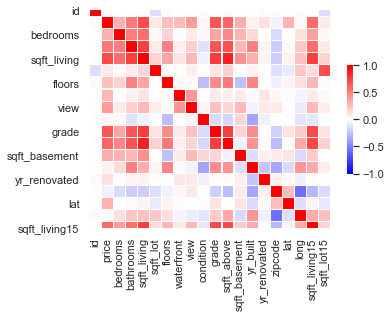

In [10]:
sns.heatmap(corr, cmap="bwr", vmax=1, vmin=-1, center=0, square = True,
             linewidths=.1, cbar_kws={"shrink": .5})

In [11]:

sales.drop(columns=["id","date"], inplace = True) #Dropping "id" since it does not affect the price. "Date" is also being removed. 

In [12]:
X = sales.drop(columns = "price")
y = sales.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
original_mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print(model_score)
print(original_mse)
print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Oreiginal Root Mean Squared Error: ", original_mse**(1/2))

0.7027786929887444
39547299966.78107
Mae:  85742.0843877308
R Square               :  0.7027786929887444
Oreiginal Root Mean Squared Error:  198865.02952198777


# Naive model: R_square of 0.702778 and RMSE of 198865.0295

In [13]:
def multicolinear_features(data):
    df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df['pairs'] = list(zip(df.level_0, df.level_1))
    df.set_index(['pairs'], inplace = True)
    df.drop(columns=['level_1', 'level_0'], inplace = True)
    df.columns = ['cc'] #correlation column
    df.drop_duplicates(inplace=True)
    return df[(df.cc>.9) & (df.cc<1) ]

multicolinear_features(sales) #checking for multicolinearity

Empty DataFrame
Columns: [cc]
Index: []

In [14]:
sales[sales["bedrooms"]== 0]


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
483     355000.0         0       0.00         2460      8049     2.0           0     0          3      8        2460              0      1990             0    98031  47.4095 -122.168           2520        8050
1120   1095000.0         0       0.00         3064      4764     3.5           0     2          3      7        3064              0      1990             0    98102  47.6362 -122.322           2360        4000
2430    265000.0         0       0.75          384    213444     1.0           0     0          3      4         384              0      2003             0    98070  47.4177 -122.491           1920      224341
3032    235000.0         0       0.00         1470      4800     2.0           0     0          3      7        1470              0      1996             0    98065  47.5265 -121.828           1060        7200
3609    339950.0         0       2.50         2290      8319     2.0           0     0          3      8        2290              0      1985             0    98042  47.3473 -122.151           2500        8751
5424    380000.0         0       0.00         1470       979     3.0           0     2          3      8        1470              0      2006             0    98133  47.7145 -122.356           1470        1399
6409    288000.0         0       1.50         1430      1650     3.0           0     0          3      7        1430              0      1999             0    98125  47.7222 -122.290           1430        1650
9286   1295650.0         0       0.00         4810     28008     2.0           0     0          3     12        4810              0      1990             0    98053  47.6642 -122.069           4740       35061
10067   142000.0         0       0.00          290     20875     1.0           0     0          1      1         290              0      1963             0    98024  47.5308 -121.888           1620       22850
10074   240000.0         0       2.50         1810      5669     2.0           0     0          3      7        1810              0      2003             0    98038  47.3493 -122.053           1810        5685
13989   228000.0         0       1.00          390      5900     1.0           0     0          2      4         390              0      1953             0    98118  47.5260 -122.261           2170        6000
15733   320000.0         0       2.50         1490      7111     2.0           0     0          3      7        1490              0      1999             0    98065  47.5261 -121.826           1500        4675

In [15]:
sales["bedrooms"].max()

33

In [16]:
print(sales.shape, imputed.shape)

(17290, 19) (12, 21)


In [17]:
sales.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
imputed #dataframe with information on the missing bedrooms

id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
483    3374500520  20150429T000000   355000.0         4       2.50         2460      8049     2.0           0     0          3      8        2460              0      1990             0    98031  47.4095 -122.168           2520        8050
1120   6306400140  20140612T000000  1095000.0         5       3.00         3064      4764     3.5           0     2          3      7        3064              0      1990             0    98102  47.6362 -122.322           2360        4000
2430   1222029077  20141029T000000   265000.0         1       0.75          384    213444     1.0           0     0          3      4         384              0      2003             0    98070  47.4177 -122.491           1920      224341
3032   7849202190  20141223T000000   235000.0         3       2.00         1470      4800     2.0           0     0          3      7        1470              0      1996             0    98065  47.5265 -121.828           1060        7200
3609   2569500210  20141117T000000   339950.0         4       3.00         2290      8319     2.0           0     0          3      8        2290              0      1985             0    98042  47.3473 -122.151           2500        8751
5424   3918400017  20150205T000000   380000.0         3       2.50         1470       979     3.0           0     2          3      8        1470              0      2006             0    98133  47.7145 -122.356           1470        1399
6409   1453602309  20140805T000000   288000.0         2       1.50         1430      1650     3.0           0     0          3      7        1430              0      1999             0    98125  47.7222 -122.290           1430        1650
9286   2954400190  20140624T000000  1295650.0         4       4.50         4810     28008     2.0           0     0          3     12        4810              0      1990             0    98053  47.6642 -122.069           4740       35061
10067  3980300371  20140926T000000   142000.0         1       0.75          290     20875     1.0           0     0          1      1         290              0      1954             0    98024  47.5308 -121.888           1620       22850
10074  2310060040  20140925T000000   240000.0         4       2.50         1810      5669     2.0           0     0          3      7        1810              0      2003             0    98038  47.3493 -122.053           1810        5685
13989  6896300380  20141002T000000   228000.0         2       1.00          390      5900     1.0           0     0          2      4         390              0      1953             0    98118  47.5260 -122.261           2170        6000
15733  7849202299  20150218T000000   320000.0         4       2.50         1490      7111     2.0           0     0          3      7        1490              0      1999             0    98065  47.5261 -121.826           1500        4675

In [19]:
print(sales.shape, imputed.shape)

(17290, 19) (12, 21)


In [20]:
imputed.drop(columns=["id","date"], inplace = True)           # dropping 2 columns to match sales and id does not really affect the model.

In [21]:
imputed.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
print(sales.shape, imputed.shape) # checking to make sure both dataframes have the same amount of columns for the merge

(17290, 19) (12, 19)


# Merging Bedroom data for 12 rows and removing bedroom outliers

In [23]:
def filled_data(df,df2):
    index=df.loc[df.bedrooms == 0].index.to_list()
    df.drop(df.index[[index]], inplace=True)
    frames= [df, df2]
    train = pd.concat(frames)
    return train
sales=filled_data(sales, imputed)

In [24]:
print(sales.shape)


(17290, 19)


In [25]:
sales["bedrooms"].sort_values(ascending = False)

8597     33
2356     11
3680     10
11181    10
17114    10
8446      9
8207      9
8624      9
3425      9
14156     9
14137     8
10700     8
9013      8
10606     8
4127      8
2991      8
9434      8
3757      8
1015      8
8419      8
2505      7
4732      7
1987      7
15824     7
6335      7
7070      7
15347     7
12523     7
9304      7
220       7
11410     7
12440     7
11183     7
8379      7
3808      7
4141      7
2548      7
3275      7
732       7
10719     7
6591      7
12219     7
15696     7
15118     7
17110     7
4651      7
5293      7
2134      7
13805     7
16318     7
4028      6
16139     6
6657      6
7525      6
2152      6
9907      6
4912      6
9118      6
4039      6
10712     6
9107      6
5630      6
11208     6
10931     6
578       6
11215     6
4058      6
13042     6
7359      6
12097     6
15075     6
1744      6
13499     6
13205     6
5173      6
8402      6
15720     6
12473     6
9161      6
2675      6
17067     6
16648     6
6381      6
7371

In [26]:
# removes outliers - bedrooms  > 10

def cap_max(x, n, data, column):
    """
    x = the column number
    n = min number
    data = dataframe
    column = interested column from dataframe
    should be applied in a lambda function.
    For example: sales["bedrooms"].apply(lambda x: cutoff(x,10,sales,"bedrooms"))
    """
    if x > n:
        return data[column].median()
    else:
        return x
sales["bedrooms"]= sales["bedrooms"].apply(lambda x: cap_max(x,10,sales,"bedrooms"))    

In [27]:
sales["bedrooms"].sort_values(ascending = False)

3680     10.0
11181    10.0
17114    10.0
14156     9.0
3425      9.0
8207      9.0
8624      9.0
8446      9.0
10700     8.0
10606     8.0
4127      8.0
9434      8.0
14137     8.0
2991      8.0
8419      8.0
9013      8.0
1015      8.0
3757      8.0
16318     7.0
3275      7.0
17110     7.0
2505      7.0
5293      7.0
12523     7.0
15824     7.0
6591      7.0
12219     7.0
15696     7.0
8379      7.0
4141      7.0
11410     7.0
732       7.0
1987      7.0
4732      7.0
3808      7.0
220       7.0
7070      7.0
12440     7.0
9304      7.0
15347     7.0
11183     7.0
2134      7.0
6335      7.0
2548      7.0
15118     7.0
10719     7.0
13805     7.0
4651      7.0
8372      6.0
13482     6.0
15580     6.0
12148     6.0
11399     6.0
9230      6.0
5554      6.0
9224      6.0
5549      6.0
4998      6.0
12140     6.0
1642      6.0
15442     6.0
16157     6.0
10092     6.0
10691     6.0
15591     6.0
16475     6.0
448       6.0
11568     6.0
14264     6.0
7586      6.0
3786      6.0
2576  

In [28]:
sales["bathrooms"].sort_values(ascending = True)

9060     0.00
12982    0.00
7093     0.50
4622     0.50
12674    0.50
8000     0.75
10086    0.75
16779    0.75
8224     0.75
5301     0.75
350      0.75
11716    0.75
10559    0.75
4921     0.75
17163    0.75
1696     0.75
4201     0.75
9193     0.75
2329     0.75
5489     0.75
7161     0.75
1438     0.75
8710     0.75
3123     0.75
3851     0.75
12578    0.75
1487     0.75
16260    0.75
11753    0.75
1540     0.75
5072     0.75
15465    0.75
3748     0.75
16398    0.75
15703    0.75
13508    0.75
11214    0.75
5612     0.75
14987    0.75
1310     0.75
2692     0.75
16126    0.75
6966     0.75
2430     0.75
7309     0.75
1379     0.75
1381     0.75
1122     0.75
9516     0.75
12662    0.75
7263     0.75
9469     0.75
11560    0.75
14509    0.75
10067    0.75
9796     0.75
1622     0.75
543      0.75
9169     1.00
9171     1.00
12586    1.00
4103     1.00
3905     1.00
3908     1.00
15326    1.00
4050     1.00
4096     1.00
15230    1.00
3922     1.00
12590    1.00
3927     1.00
12591 

In [29]:
def cap_min(x, n, data, column):
    """
    x = the column number
    n = min number
    data = dataframe
    column = interested column from dataframe
    should be applied in a lambda function.
    For example: sales["bedrooms"].apply(lambda x: cutoff(x,10,sales,"bedrooms"))
    """
    if x == n:
        return data[column].median()
    else:
        return x

In [30]:
sales["bathrooms"]= sales["bathrooms"].apply(lambda x: cap_min(x,0,sales,"bedrooms"))  

In [31]:
sales["bathrooms"].sort_values(ascending = True)

12674    0.50
7093     0.50
4622     0.50
1310     0.75
3851     0.75
15703    0.75
16126    0.75
11560    0.75
16398    0.75
1622     0.75
14987    0.75
3123     0.75
6966     0.75
2329     0.75
4201     0.75
12662    0.75
3748     0.75
16779    0.75
2692     0.75
16260    0.75
9469     0.75
8710     0.75
9796     0.75
11716    0.75
543      0.75
5489     0.75
1540     0.75
5301     0.75
1379     0.75
1122     0.75
1381     0.75
7263     0.75
4921     0.75
15465    0.75
350      0.75
9193     0.75
10086    0.75
14509    0.75
8224     0.75
13508    0.75
12578    0.75
1487     0.75
10067    0.75
2430     0.75
1696     0.75
5612     0.75
8000     0.75
9516     0.75
10559    0.75
5072     0.75
11214    0.75
7161     0.75
11753    0.75
1438     0.75
17163    0.75
7309     0.75
16111    1.00
4164     1.00
2362     1.00
7227     1.00
13680    1.00
7226     1.00
13673    1.00
2358     1.00
7225     1.00
2357     1.00
2335     1.00
9190     1.00
9604     1.00
9202     1.00
2299     1.00
10721 

In [32]:
sales.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0   365000.0       4.0       2.25         2070      8893     2.0           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700
1   865000.0       5.0       3.00         2900      6730     1.0           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283
2  1038000.0       4.0       2.50         3770     10893     2.0           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685
3  1490000.0       3.0       3.50         4560     14608     2.0           0     2          3     12        4560              0      1990             0    98034  47.6995 -122.228           4050       14226
4   711000.0       3.0       2.50         2550      5376     2.0           0     0          3      9        2550              0      2004             0    98052  47.6647 -122.083           2250        4050

In [33]:
sales.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [34]:
multicolinear_features(sales)

Empty DataFrame
Columns: [cc]
Index: []

In [35]:
multicolinear_features(sales.drop(columns = ["sqft_above"]))

Empty DataFrame
Columns: [cc]
Index: []

# Checking the effect of the new data additions

In [36]:
X = sales.drop(columns = ["price"])
y = sales.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print(model_score)
print(mse)
print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

0.6906955354973479
43818591445.58683
Mae:  91521.51749724802
R Square               :  0.6906955354973479
Root Mean Squared Error:  209328.90733385782


# Adding More Data

In [38]:
training_data = pd.merge(sales, extra, how='right', on='zipcode')

In [39]:
training_data.shape


(17290, 73)

In [40]:
date

date
0      20141006T000000
1      20140821T000000
2      20140815T000000
3      20150331T000000
4      20140714T000000
5      20140827T000000
6      20140819T000000
7      20141017T000000
8      20140804T000000
9      20140516T000000
10     20150422T000000
11     20150303T000000
12     20150128T000000
13     20150507T000000
14     20150323T000000
15     20140603T000000
16     20150206T000000
17     20141029T000000
18     20141016T000000
19     20150202T000000
20     20140910T000000
21     20141103T000000
22     20141120T000000
23     20141009T000000
24     20140620T000000
25     20140718T000000
26     20140826T000000
27     20141218T000000
28     20150309T000000
29     20150304T000000
30     20150223T000000
31     20150408T000000
32     20140801T000000
33     20141024T000000
34     20140812T000000
35     20150112T000000
36     20150312T000000
37     20140910T000000
38     20140729T000000
39     20141201T000000
40     20140903T000000
41     20140516T000000
42     20140603T000000
43     20150218T000000
44     20140503T000000
45     20150502T000000
46     20140718T000000
47     20150325T000000
48     20150424T000000
49     20150218T000000
50     20140812T000000
51     20140807T000000
52     20140514T000000
53     20141024T000000
54     20141215T000000
55     20140731T000000
56     20141106T000000
57     20140515T000000
58     20140619T000000
59     20141013T000000
60     20150123T000000
61     20150409T000000
62     20141022T000000
63     20140808T000000
64     20141028T000000
65     20150129T000000
66     20141020T000000
67     20141028T000000
68     20150326T000000
69     20140908T000000
70     20150417T000000
71     20140724T000000
72     20140602T000000
73     20140710T000000
74     20140603T000000
75     20150228T000000
76     20150423T000000
77     20150224T000000
78     20140714T000000
79     20140612T000000
80     20150206T000000
81     20140902T000000
82     20150422T000000
83     20150211T000000
84     20140626T000000
85     20150219T000000
86     20141009T000000
87     20140815T000000
88     20150305T000000
89     20140516T000000
90     20141119T000000
91     20140606T000000
92     20140619T000000
93     20141215T000000
94     20141229T000000
95     20150327T000000
96     20150430T000000
97     20141015T000000
98     20150327T000000
99     20141202T000000
100    20140718T000000
101    20150327T000000
102    20150327T000000
103    20150109T000000
104    20140618T000000
105    20140807T000000
106    20140628T000000
107    20141124T000000
108    20140609T000000
109    20140630T000000
110    20141103T000000
111    20140626T000000
112    20150126T000000
113    20140914T000000
114    20150224T000000
115    20140827T000000
116    20141024T000000
117    20141029T000000
118    20150402T000000
119    20150506T000000
120    20150318T000000
121    20140715T000000
122    20141020T000000
123    20140612T000000
124    20140801T000000
125    20140925T000000
126    20150120T000000
127    20140620T000000
128    20140612T000000
129    20140911T000000
130    20140505T000000
131    20150417T000000
132    20141029T000000
133    20140509T000000
134    20140605T000000
135    20150326T000000
136    20141117T000000
137    20150423T000000
138    20141003T000000
139    20150212T000000
140    20140821T000000
141    20140817T000000
142    20141015T000000
143    20150410T000000
144    20140729T000000
145    20150401T000000
146    20141027T000000
147    20141124T000000
148    20150211T000000
149    20140929T000000
150    20150102T000000
151    20141110T000000
152    20140923T000000
153    20150204T000000
154    20140714T000000
155    20150318T000000
156    20150325T000000
157    20141208T000000
158    20150108T000000
159    20140527T000000
160    20150413T000000
161    20141212T000000
162    20141003T000000
163    20150220T000000
164    20140522T000000
165    20140905T000000
166    20150506T000000
167    20150406T000000
168    20150203T000000
169    20150326T000000
170    20140911T000000
171    20141107T000000
172    20150408T000000
173    20140707T

In [41]:
#date.column = date

In [42]:
training_data = pd.merge(training_data, date, how = "outer", left_index=True, right_index=True)


In [43]:
training_data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  full_time_earnings  part_time_earnings  no_earnings  car_truck_van  public_transportation  taxi  motorcycle  bike_walk_other  work_home  less_than_hs  high_school_grad  associates  bachelors  masters  professional_school_degree  doctorate  public_school_enrollment  private_school_enrollment  no_school_enrollment  for_rent  rented_and_unoccupied  for_sale_only  sold_and_unoccupied  seasonal_or_rec_use  migrant_worker_housing  vacant_other_reasons  in_occupied_housing_units  adult_correctional_facility  juvenile_facilities  nursing_facilities  other_institutional  military_quarters  other_noninstitutional  house_owned_with_mortgage  house_owned_outright  renter_occupied_housing  vacant_households  husband_and_wife_house  single_guardian  singles  singles_with_roommate   male  female  \
0  365000.0       4.0       2.25         2070      8893     2.0           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700               15510                9689         9208          19448                   1126     0          65              286       1067          2447             13469        3249       7929     2153                         274        226                      7014                        847                  1248       272                     29            162                   35                   58                       0                   169                      41809                            0                    0                  22                    5                  0                     102                       8929                  2270                     4196                725                    8685             2490     3215                   1005  20786   21152   
1  455000.0       4.0       1.75         2050     94525     1.0           0     0          4      7        1250            800      1959             0    98058  47.4492 -122.084           2270       47480               15510                9689         9208          19448                   1126     0          65              286       1067          2447             13469        3249       7929     2153                         274        226                      7014                        847                  1248       272                     29            162                   35                   58                       0                   169                      41809                            0                    0                  22                    5                  0                     102                       8929                  2270                     4196                725                    8685             2490     3215                   1005  20786   21152   
2  273000.0       3.0       1.75         2050      9045     2.0           0     0          4      6        2050              0      1959             0    98058  47.4572 -122.180           1200        9045               15510                9689         9208          19448                   1126     0          65              286       1067          2447             13469        3249       7929     2153                         274        226                      7014                        847                  1248       272                     29            162                   35                   58                       0                   169                      41809                            0                    0                  22                    5                  0                     102                       8929                  2270                     4196                725                    8685             2490     3215                   1005  20786   21152   
3 

In [44]:
training_data.isnull().sum()

price                             0
bedrooms                          0
bathrooms                         0
sqft_living                       0
sqft_lot                          0
floors                            0
waterfront                        0
view                              0
condition                         0
grade                             0
sqft_above                        0
sqft_basement                     0
yr_built                          0
yr_renovated                      0
zipcode                           0
lat                               0
long                              0
sqft_living15                     0
sqft_lot15                        0
full_time_earnings                0
part_time_earnings                0
no_earnings                       0
car_truck_van                     0
public_transportation             0
taxi                              0
motorcycle                        0
bike_walk_other                   0
work_home                   

In [45]:
training_data["month"] = pd.DatetimeIndex(training_data["date"]).month
training_data.drop(columns=["date"], inplace = True)

In [46]:
training_data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  full_time_earnings  part_time_earnings  no_earnings  car_truck_van  public_transportation  taxi  motorcycle  bike_walk_other  work_home  less_than_hs  high_school_grad  associates  bachelors  masters  professional_school_degree  doctorate  public_school_enrollment  private_school_enrollment  no_school_enrollment  for_rent  rented_and_unoccupied  for_sale_only  sold_and_unoccupied  seasonal_or_rec_use  migrant_worker_housing  vacant_other_reasons  in_occupied_housing_units  adult_correctional_facility  juvenile_facilities  nursing_facilities  other_institutional  military_quarters  other_noninstitutional  house_owned_with_mortgage  house_owned_outright  renter_occupied_housing  vacant_households  husband_and_wife_house  single_guardian  singles  singles_with_roommate   male  female  \
0  365000.0       4.0       2.25         2070      8893     2.0           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700               15510                9689         9208          19448                   1126     0          65              286       1067          2447             13469        3249       7929     2153                         274        226                      7014                        847                  1248       272                     29            162                   35                   58                       0                   169                      41809                            0                    0                  22                    5                  0                     102                       8929                  2270                     4196                725                    8685             2490     3215                   1005  20786   21152   
1  455000.0       4.0       1.75         2050     94525     1.0           0     0          4      7        1250            800      1959             0    98058  47.4492 -122.084           2270       47480               15510                9689         9208          19448                   1126     0          65              286       1067          2447             13469        3249       7929     2153                         274        226                      7014                        847                  1248       272                     29            162                   35                   58                       0                   169                      41809                            0                    0                  22                    5                  0                     102                       8929                  2270                     4196                725                    8685             2490     3215                   1005  20786   21152   
2  273000.0       3.0       1.75         2050      9045     2.0           0     0          4      6        2050              0      1959             0    98058  47.4572 -122.180           1200        9045               15510                9689         9208          19448                   1126     0          65              286       1067          2447             13469        3249       7929     2153                         274        226                      7014                        847                  1248       272                     29            162                   35                   58                       0                   169                      41809                            0                    0                  22                    5                  0                     102                       8929                  2270                     4196                725                    8685             2490     3215                   1005  20786   21152   
3 

#### Checking the numbers again on the new Dataframe (TRAINING_DATA). 

In [47]:
X = training_data.drop(columns = "price")
y = training_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)


print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

R Square               :  0.8045807787590269
Root Mean Squared Error:  154482.54436648844


In [49]:
training_data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot        floors    waterfront          view     condition         grade    sqft_above  sqft_basement      yr_built  yr_renovated       zipcode           lat          long  sqft_living15     sqft_lot15  full_time_earnings  part_time_earnings   no_earnings  car_truck_van  public_transportation          taxi    motorcycle  bike_walk_other     work_home  less_than_hs  high_school_grad    associates     bachelors       masters  professional_school_degree     doctorate  public_school_enrollment  private_school_enrollment  no_school_enrollment      for_rent  rented_and_unoccupied  for_sale_only  sold_and_unoccupied  seasonal_or_rec_use  migrant_worker_housing  vacant_other_reasons  in_occupied_housing_units  adult_correctional_facility  juvenile_facilities  nursing_facilities  other_institutional  military_quarters  other_noninstitutional  house_owned_with_mortgage  house_owned_outright  renter_occupied_housing  \
count  1.729000e+04  17290.000000  17290.000000  17290.000000  1.729000e+04  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000   17290.000000        17290.000000        17290.000000  17290.000000   17290.000000           17290.000000  17290.000000  17290.000000     17290.000000  17290.000000  17290.000000      17290.000000  17290.000000  17290.000000  17290.000000                17290.000000  17290.000000              17290.000000               17290.000000           17290.00000  17290.000000           17290.000000   17290.000000         17290.000000         17290.000000            17290.000000          17290.000000               17290.000000                 17290.000000         17290.000000        17290.000000         17290.000000       17290.000000            17290.000000               17290.000000          17290.000000             17290.000000   
mean   5.407395e+05      3.372412      2.113201   2081.464604  1.524340e+04      1.490312      0.007981      0.238519      3.408502      7.654425   1789.306015     292.158589   1970.791498     83.806304  98078.193175     47.560058   -122.214258    1987.986698   12873.475824        11384.356044         6907.222672   6939.445807   12432.798381            1758.310295      9.558647     56.258068       883.609717    972.360555   1588.785252       8023.597513   1775.798265   6521.753557   2742.313418                  682.350087    520.536842               4161.595084                 972.573106             538.17941    348.761365              24.574031     185.491498            36.427820            93.274783                0.276460            170.952342               30251.528282                    19.578890             8.391556           95.125217             3.467438           3.119607              172.215963                6090.998149           1624.427241              4611.644997   
std    3.733190e+05      0.906370      0.769544    920.018539  4.230462e+04      0.538909      0.088985      0.775229      0.651296      1.174718    829.265107     443.151874     29.343734    400.329376     53.607949      0.138412      0.140857     684.802635   27227.437583         4379.029480         3034.579357   2708.574493    4793.642243            1457.802620     16.657164     44.757148      1066.050418    474.862849   1312.944479       3883.242895    766.535635   3149.257748   1790.331918                  525.530251    519.204309               1939.617255                 522.099187             347.96309    259.957396              22.611228     129.285062            14.452145            85.102427                1.657331             68.799165               10988.712277                   105.955117            24.090868          123.785855             8.793063          33.460879              153.846878                2241.409157            651.481983              2928.098098   
min    7.500000e+04      1.000000 

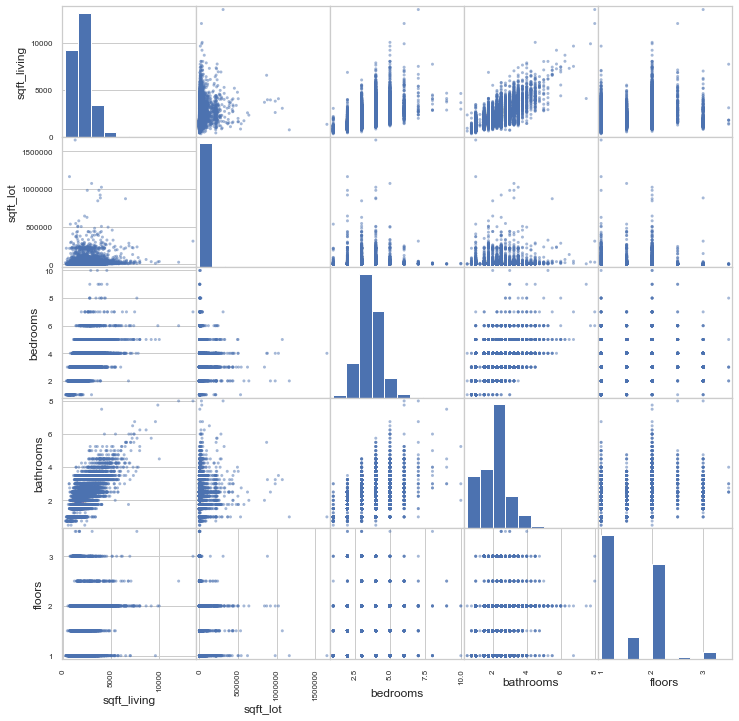

In [50]:
pd.plotting.scatter_matrix(training_data[["sqft_living", "sqft_lot","bedrooms","bathrooms","floors"]],figsize  = (12, 12));
plt.show()

In [51]:
categorical =['bedrooms', 'view', 'waterfront', 'bathrooms', 'floors','condition',
              'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'month']

non_cat = ['sqft_living','sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']

target = "price"

predictor = "Mix of categorical and non categorical"

In [52]:
# with sns.plotting_context("notebook",font_scale=2.5):
#     g = sns.pairplot(training_data, size=6)
# g.set(xticklabels=[]);

In [53]:
training_data.head(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  full_time_earnings  part_time_earnings  no_earnings  car_truck_van  public_transportation  taxi  motorcycle  bike_walk_other  work_home  less_than_hs  high_school_grad  associates  bachelors  masters  professional_school_degree  doctorate  public_school_enrollment  private_school_enrollment  no_school_enrollment  for_rent  rented_and_unoccupied  for_sale_only  sold_and_unoccupied  seasonal_or_rec_use  migrant_worker_housing  vacant_other_reasons  in_occupied_housing_units  adult_correctional_facility  juvenile_facilities  nursing_facilities  other_institutional  military_quarters  other_noninstitutional  house_owned_with_mortgage  house_owned_outright  renter_occupied_housing  vacant_households  husband_and_wife_house  single_guardian  singles  singles_with_roommate   male  female  \
0  365000.0       4.0       2.25         2070      8893     2.0           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700               15510                9689         9208          19448                   1126     0          65              286       1067          2447             13469        3249       7929     2153                         274        226                      7014                        847                  1248       272                     29            162                   35                   58                       0                   169                      41809                            0                    0                  22                    5                  0                     102                       8929                  2270                     4196                725                    8685             2490     3215                   1005  20786   21152   
1  455000.0       4.0       1.75         2050     94525     1.0           0     0          4      7        1250            800      1959             0    98058  47.4492 -122.084           2270       47480               15510                9689         9208          19448                   1126     0          65              286       1067          2447             13469        3249       7929     2153                         274        226                      7014                        847                  1248       272                     29            162                   35                   58                       0                   169                      41809                            0                    0                  22                    5                  0                     102                       8929                  2270                     4196                725                    8685             2490     3215                   1005  20786   21152   

   median_age  male_median_age  female_median_age  population  population_density_per_sq_mile  total_housing_units  median_home_value  land_area  water_area_sq_mile  occupied_housing_units  median_household_income  month  
0          38               37                 38       41938                            2215                16120           302200.0      18.93                0.83                   15395                  77780.0     10  
1          38               37                 38       41938                            2215                16120           302200.0      18.93                0.83                   15395                  77780.0      8

In [54]:
from geopy.distance import geodesic
downtown = (47.609862, -122.342056) 
training_data['coords'] = tuple(zip(training_data['lat'],training_data['long']))
x = training_data['coords'].apply(lambda x: geodesic(downtown,x))
training_data['miles_from_downtown'] = x.astype(str).str[:-3].astype(float)


In [ ]:
training_data

In [ ]:
corra=training_data.corr()

In [ ]:

fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)


sns.heatmap(corra, cmap="bwr", vmax=1,vmin=-1, center=0, square = True,
             linewidths=.1, cbar_kws={"shrink": .5});

In [ ]:
training_data.info()

In [ ]:
training_data.drop(columns = "coords", inplace = True)

In [ ]:
X = training_data.drop(columns = "price")
y = training_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

# model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
# ev = metrics.explained_variance_score(y_test, y_pred)

# print(model_score)
# print(mse)
# print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

# Data Visualizations on Contineous Features:


In [ ]:
training_data["price"].max() 

In [ ]:
training_data.head()

# Statistics to Determine the features

In [ ]:
training_data["house_years"] = abs(training_data["yr_renovated"]-training_data["yr_built"])

training_data["house_age_2015"] = 2015 - training_data["yr_built"] # age of the house by 25 with or without renovation. 

In [ ]:
training_data.shape

In [ ]:
training_data

In [ ]:
X = training_data.drop(columns = "price")
y = training_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

# model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
# ev = metrics.explained_variance_score(y_test, y_pred)

# print(model_score)
# print(mse)
# print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

In [ ]:

yes_waterfront = training_data[training_data["waterfront"]==1]
no_waterfront = training_data[training_data["waterfront"]==0]

# Statistics on Categorical Features

In [ ]:
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
stats.ttest_ind(yes_waterfront.price, no_waterfront.price) #Waterfront has a statistically significant difference on price. 

In [ ]:
# View - an index from 0-4 of how good the view of the propert was (0 = horrible, 4 = great)
good_view = training_data[training_data["view"]>=3]
bad_view = training_data[training_data["view"]<=2]

In [ ]:
stats.ttest_ind(good_view.price, bad_view.price) #View has a statistically significant difference on price. 

In [ ]:
training.floors.value_counts()

In [ ]:
formula = 'price~C(floors)'
lm = ols(formula, training_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table) 

In [ ]:
training_data.groupby("floors").price.mean()


In [ ]:
formula = 'price~C(grade)'
lm = ols(formula, training_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table) 

In [ ]:
training_data.groupby("grade").price.mean()

In [ ]:
def ones_greater_zeros(grade):
    if grade >= 10:
        return 1
    else:
        return 0

training_data["good_grade"]= training_data["grade"].apply(ones_greater_zeros)

In [ ]:
training_data.head()

In [ ]:
training_data.good_grade.value_counts()

In [ ]:
formula = 'price~C(no_earnings)'
lm = ols(formula, training_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table) 

In [ ]:
training_data.groupby(["no_earnings", "zipcode"]).price.mean()

In [ ]:
training_data.shape

In [ ]:
formula = 'price~miles_from_downtown'
lm = ols(formula, training_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table) 

In [ ]:
waterfront_dummies = pd.get_dummies(training_data["waterfront"], prefix="wfront",  drop_first = True)
view_dummies = pd.get_dummies(training_data["view"], prefix="view", drop_first = True)
grade_dummies = pd.get_dummies(training_data["grade"], prefix="grade",  drop_first = True)
zipcode_dummies = pd.get_dummies(training_data["zipcode"], prefix="zipcode",  drop_first = True)
bedroom_dummies = pd.get_dummies(training_data["bedrooms"], prefix="rooms",  drop_first = True)
bathroom_dummies = pd.get_dummies(training_data["bathrooms"], prefix="bathrooms", drop_first = True)
month_dummies = pd.get_dummies(training_data["month"], prefix="month", drop_first = True)

In [ ]:
data_fin = pd.concat([training_data, waterfront_dummies, view_dummies, grade_dummies,zipcode_dummies, bedroom_dummies, bathroom_dummies, month_dummies], axis=1)

In [ ]:
data_fin.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_fin, prices, random_state=42,test_size=0.2)

In [ ]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

In [ ]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

In [ ]:
data_fin.columns

# Trying Predictions on the Holdout

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(training_data, prices, random_state=42,test_size=0.2)

In [ ]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

In [ ]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

In [ ]:

sns.residplot( y_test, y_test_pred,lowess=True, color="g")

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
df_poly3 = pd.DataFrame(data=scaler.fit_transform(data_fin), columns=data_fin.columns)

In [ ]:
selector = SelectKBest(f_regression, k=50)

selector.fit(df_poly3, target)

In [ ]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state=9,test_size=0.2)
scaler3 = StandardScaler()
# fit the scaler to the training data
scaler3.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler3.transform(X_train), columns=df_poly3.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler3.transform(X_test), columns=df_poly3.columns)

In [ ]:
import pickle
model = open("model.pickle", "rb")
pickle.load

In [ ]:
pickle.load(open)

HOLDOUT DATA - has 1 less zipcode... 